In [7]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from infomap import Infomap

def load_network(file_path):
    # Assuming the network is stored in an edge list format
    # G = nx.read_edgelist(file_path, nodetype=int)
    G = nx.read_pajek(file_path)
    G = nx.Graph(G)
    return G

def detect_communities(G, method='louvain'):
    if method == 'louvain':
        partition = community_louvain.best_partition(G)
    elif method == 'infomap':
        infomap = Infomap()
        for edge in G.edges():
            infomap.add_link(*edge)
        infomap.run()
        partition = {node: module for node, module in infomap.get_modules().items()}
    else:
        raise ValueError("Unsupported method: Choose 'louvain' or 'infomap'")
    return partition

def calculate_metrics(true_partition, detected_partition):
    # Convert partition dictionaries to lists of community labels
    true_labels = [true_partition[node] for node in sorted(true_partition)]
    detected_labels = [detected_partition[node] for node in sorted(detected_partition)]
    nmi = normalized_mutual_info_score(true_labels, detected_labels)
    ari = adjusted_rand_score(true_labels, detected_labels)
    return nmi, ari

def visualize_communities(G, partition, title):
    pos = nx.spring_layout(G)  # positions for all nodes
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(partition.values()))),
                 label='Community ID')
    plt.show()


In [8]:
G = load_network('A3_synthetic_networks/synthetic_network_N_300_blocks_5_prr_0.50_prs_0.02.net')

In [10]:
# Example usage

# true_partition = {node: node // 60 for node in G.nodes()}  # Example true partition logic
louvain_partition = detect_communities(G, 'louvain')
infomap_partition = detect_communities(G, 'infomap')

# nmi_louvain, ari_louvain = calculate_metrics(true_partition, louvain_partition)
# nmi_infomap, ari_infomap = calculate_metrics(true_partition, infomap_partition)

# print("NMI (Louvain):", nmi_louvain, "ARI (Louvain):", ari_louvain)
# print("NMI (Infomap):", nmi_infomap, "ARI (Infomap):", ari_infomap)

# visualize_communities(G, louvain_partition, "Louvain Method")
# visualize_communities(G, infomap_partition, "Infomap Method")

TypeError: Wrong number or type of arguments for overloaded function 'InfomapWrapper_addLink'.
  Possible C/C++ prototypes are:
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int,double)
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int)
    infomap::InfomapWrapper::addLink(unsigned int,unsigned int,unsigned long)


In [31]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from infomap import Infomap

def load_network(file_path):
    # Load a network from a Pajek .net file
    G = nx.read_pajek(file_path)
    # Convert the network to an undirected graph, if necessary
    if isinstance(G, nx.DiGraph):
        G = G.to_undirected()
    # Pajek files often label nodes with strings, ensure they are consistent integers if needed
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    return G

def detect_communities(G, method='louvain'):
    if method == 'louvain':
        partition = community_louvain.best_partition(G)
    elif method == 'infomap':
        infomap = Infomap()
        for edge in G.edges():
            infomap.add_link(*edge)
        infomap.run()
        partition = {str(node): module for node, module in infomap.get_modules().items()}
    else:
        raise ValueError("Unsupported method: Choose 'louvain' or 'infomap'")
    return partition

def calculate_metrics(true_partition, detected_partition):
    # Convert partition dictionaries to lists of community labels
    true_labels = [true_partition[node] for node in sorted(true_partition)]
    detected_labels = [detected_partition[node] for node in sorted(detected_partition)]
    nmi = normalized_mutual_info_score(true_labels, detected_labels)
    ari = adjusted_rand_score(true_labels, detected_labels)
    return nmi, ari

def visualize_communities(G, partition, title):
    pos = nx.spring_layout(G)  # positions for all nodes
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(partition.values()))),
                 label='Community ID')
    plt.show()



In [48]:
# Example usage
G = load_network('A3_synthetic_networks/synthetic_network_N_300_blocks_5_prr_0.50_prs_0.02.net')
true_partition = {node: node // 60 for node in G.nodes()}  # Example true partition logic
louvain_partition = detect_communities(G, 'louvain')
infomap_partition = detect_communities(G, 'infomap')

nmi_louvain, ari_louvain = calculate_metrics(true_partition, louvain_partition)
nmi_infomap, ari_infomap = calculate_metrics(true_partition, infomap_partition)

print("NMI (Louvain):", nmi_louvain, "ARI (Louvain):", ari_louvain)
print("NMI (Infomap):", nmi_infomap, "ARI (Infomap):", ari_infomap)

#visualize_communities(G, louvain_partition, "Louvain Method")
# visualize_communities(G, infomap_partition, "Infomap Method")

NMI (Louvain): 1.0 ARI (Louvain): 1.0
NMI (Infomap): 1.0 ARI (Infomap): 1.0


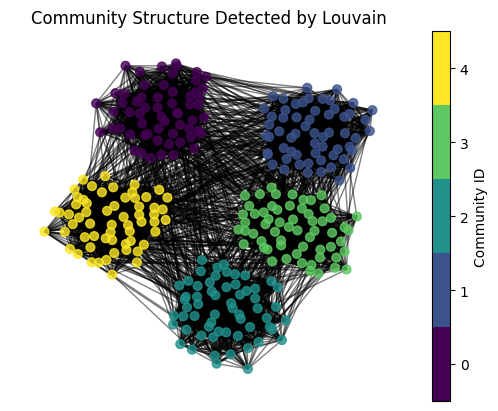

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.pyplot as plt
import networkx as nx

def visualize_communities(G, partition, title):
    # Ensure node labels are consistent for mapping colors
    unique_communities = list(set(partition.values()))
    community_index = {comm: idx for idx, comm in enumerate(unique_communities)}
    colors = [community_index[partition[node]] for node in G.nodes()]

    # Generate position map for consistent node positions
    pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for reproducible layout

    # Create a new figure and Axes for drawing
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('viridis', len(unique_communities))
    
    # Drawing the nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=colors, cmap=cmap, node_size=40, alpha=0.8)
    
    # Drawing the edges
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)

    # Setting up the color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, ticks=np.linspace(min(colors), max(colors), len(unique_communities)), 
                        boundaries=np.arange(min(colors)-0.5, max(colors)+1.5), spacing='proportional',
                        label='Community ID')

    ax.set_title(title)
    ax.axis('off')  # Turn off the axis
    
    plt.show()

visualize_communities(G, louvain_partition, "Community Structure Detected by Louvain")

In [46]:
def detect_communities(G, method='louvain'):
    if method == 'louvain':
        partition = community_louvain.best_partition(G)
    elif method == 'infomap':
        infomap = Infomap()
        # Ensure that node labels are converted to integers if they are not already
        for edge in G.edges():
            u, v = map(int, edge)  # Convert edge endpoints to integers
            infomap.add_link(u, v)
        infomap.run()
        # Mapping node to module with proper node type handling
        partition = {int(node): module for node, module in infomap.get_modules().items()}
    else:
        raise ValueError("Unsupported method: Choose 'louvain' or 'infomap'")
    return partition


def visualize_communities(G, partition, title):
    # Check if all G nodes are in partition and handle any missing
    if not all(node in partition for node in G.nodes()):
        missing_nodes = [node for node in G.nodes() if node not in partition]
        print(f"Warning: Nodes missing in partition: {missing_nodes}")
        for node in missing_nodes:
            partition[node] = -1  # Assigning a default community for missing nodes
    
    unique_communities = set(partition.values())
    community_index = {comm: idx for idx, comm in enumerate(unique_communities)}
    
    colors = [community_index[partition[node]] for node in G.nodes()]

    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    cmap = plt.get_cmap('viridis', len(unique_communities))
    nx.draw_networkx_nodes(G, pos, node_size=40, node_color=colors, cmap=cmap, alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.05)
    cbar.set_label('Community ID')

    ax.set_title(title)
    ax.axis('off')
    plt.show()


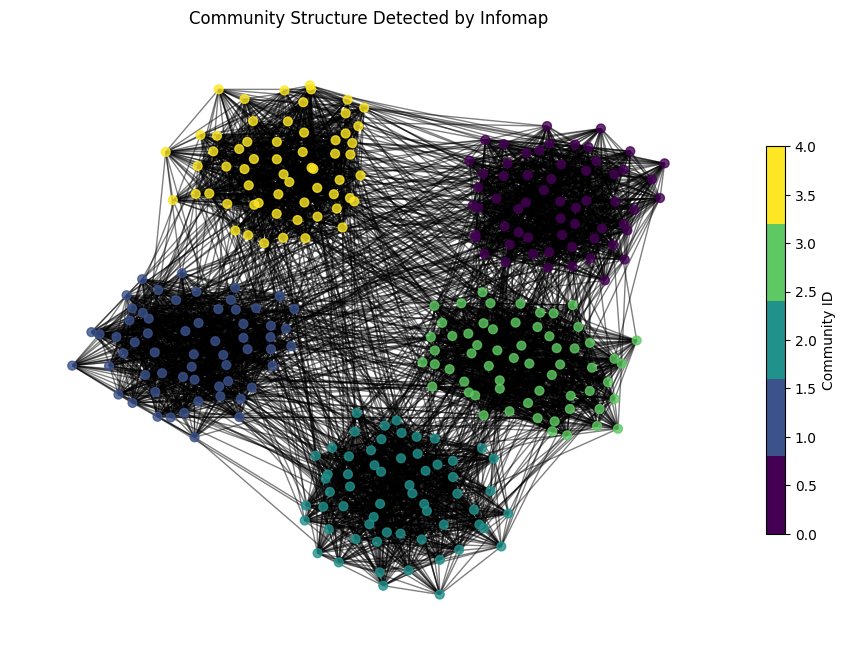

In [47]:
infomap_partition = detect_communities(G, 'infomap')
visualize_communities(G, infomap_partition, "Community Structure Detected by Infomap")

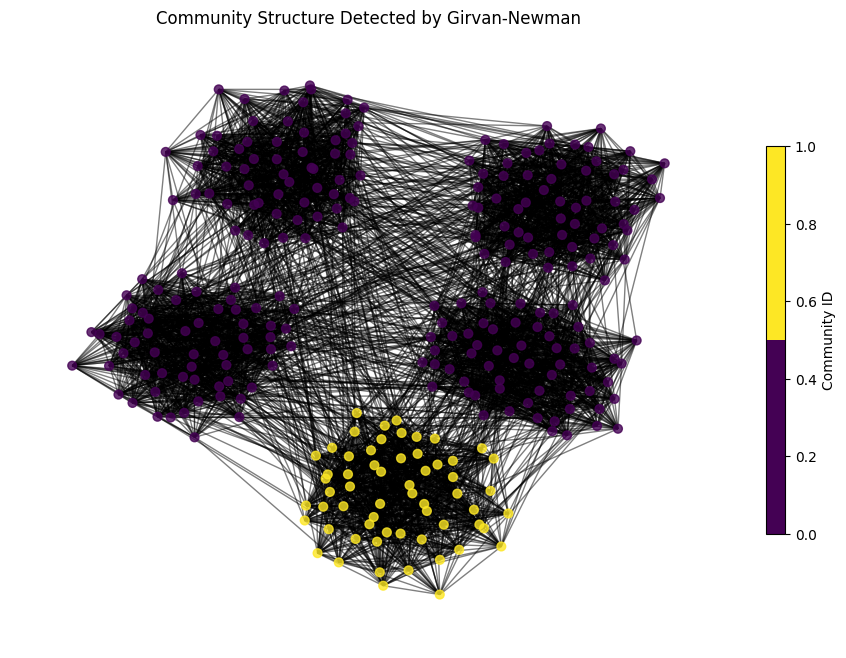

In [49]:
import networkx as nx

def girvan_newman_community_detection(G, num_communities=2):
    from networkx.algorithms.community import girvan_newman
    communities_generator = girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    # Choose the level of communities to return based on your num_communities parameter
    if num_communities == 2:
        return {node: idx for idx, community in enumerate(top_level_communities) for node in community}
    else:
        return {node: idx for idx, community in enumerate(next_level_communities) for node in community}

# Example usage
# Adjust num_communities based on how many splits you want to examine initially
gn_partition = girvan_newman_community_detection(G, num_communities=2)
visualize_communities(G, gn_partition, "Community Structure Detected by Girvan-Newman")
